In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading pre-processed data / Creating training and test data sets

In [3]:
data = pd.read_csv('cleaned_data.csv') # load cleaned data

In [4]:
data

,review,sentiment,lemmatization
0,one reviewers mentioned watching oz episode ho...,positive,reviewer mentioned oz episode hooked exactly h...
1,wonderful little production filming technique ...,positive,wonderful production filming technique unassum...
2,thought wonderful way spend time hot summer we...,positive,wonderful spend hot summer weekend sitting air...
3,basically family little boy jake thinks zombie...,negative,basically family boy jake zombie closet parent...
4,petter mattei love time money visually stunnin...,positive,petter mattei money visually stunning mr matte...
...,...,...,...
49577,thought movie right good job creative original...,positive,job creative original expecting whole lotta fu...
49578,bad plot bad dialogue bad acting idiotic direc...,negative,dialogue idiotic directing annoying porn groov...
49579,catholic taught parochial elementary schools n...,negative,catholic taught parochial elementary school nu...
49580,going disagree previous comment side maltin on...,negative,disagree previous comment side maltin second r...


In [5]:
# mapping the sentiment as 0 for neg and 1 for positive
data['sentiment'] = data['sentiment'].map({'positive':1,'negative':0})

# Devide data to test and training data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['lemmatization'], data["sentiment"], train_size = 0.75)


# Prepare TF - IDF

In [7]:
tf_vectorizer = TfidfVectorizer(min_df=2) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf = tf_vectorizer.fit_transform(X_train) # run method fit_transform on training set
X_test_tf = tf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 37186, n_features: 46165
n_samples: 12396, n_features: 46165


# Prepare TF - IDF with limited number of words

In [8]:
tf_vectorizer2 = TfidfVectorizer(min_df=5,  max_df=0.9 ) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf2 = tf_vectorizer2.fit_transform(X_train) # run method fit_transform on training set
X_test_tf2 = tf_vectorizer2.transform(X_test)
 
print("n_samples: %d, n_features: %d" % X_train_tf2.shape)
print("n_samples: %d, n_features: %d" % X_test_tf2.shape)

 

n_samples: 37186, n_features: 28379
n_samples: 12396, n_features: 28379


In [9]:
X_test_tf2

<12396x28379 sparse matrix of type '<class 'numpy.float64'>'
	with 891394 stored elements in Compressed Sparse Row format>

# Prepare Count Vectorizer

In [10]:
count_vectorizer = CountVectorizer() # or term frequency
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)
print("n_samples: %d, n_features: %d" % X_test_cv.shape)

n_samples: 37186, n_features: 81133
n_samples: 12396, n_features: 81133


#  Naives Bayes + TF-Idf

In [11]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_tf, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_tf)
 
 
 

In [12]:
#result Naive Bayes + TF-IDF

In [14]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
print('------------------------------')


accuracy:   0.863
              precision    recall  f1-score   support

    Positive       0.86      0.87      0.86      6168
    Negative       0.87      0.86      0.86      6228

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5344  824]
 [ 870 5358]]
------------------------------


In [135]:
cm1=confusion_matrix(y_test, y_pred)

#  Naives Bayes + Count Vector

In [15]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_cv, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_cv)
 
 
 

In [16]:
#result Naive Bayes + Count Vect

In [17]:

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm2 = metrics.confusion_matrix(y_test, y_pred)
print (cm2)

print('------------------------------')

 

accuracy:   0.860
              precision    recall  f1-score   support

    Positive       0.85      0.88      0.86      6168
    Negative       0.87      0.84      0.86      6228

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5403  765]
 [ 973 5255]]
------------------------------


# Naives Bayes + TF-Idf limited 

In [18]:
naive_bayes_classifier2 = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier2.fit(X_train_tf2, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier2.predict(X_test_tf2)
 
 
 

In [19]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


accuracy:   0.861
              precision    recall  f1-score   support

    Positive       0.86      0.86      0.86      6168
    Negative       0.86      0.86      0.86      6228

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5321  847]
 [ 872 5356]]
------------------------------


# KNeighborsClassifier . - TF idf


In [108]:
import matplotlib.pyplot as plt
import numpy

In [109]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model and Predict
k = 8  #best Result
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_tf,y_train)


 

In [110]:
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
y_pred = neigh.predict(X_test_tf)

print("Accuracy of model at K=8 is",metrics.accuracy_score(y_test, y_pred))
    
    
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

 
 
    

Accuracy of model at K=8 is 0.7700064536947402
accuracy:   0.770
              precision    recall  f1-score   support

    Positive       0.78      0.76      0.77      6237
    Negative       0.76      0.78      0.77      6159

    accuracy                           0.77     12396
   macro avg       0.77      0.77      0.77     12396
weighted avg       0.77      0.77      0.77     12396

confusion matrix:
[[4743 1494]
 [1357 4802]]
------------------------------


# K means 1-10 TF- IDF 

In [22]:
# K von 1 bis 10 

In [39]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.22536 at K = 8


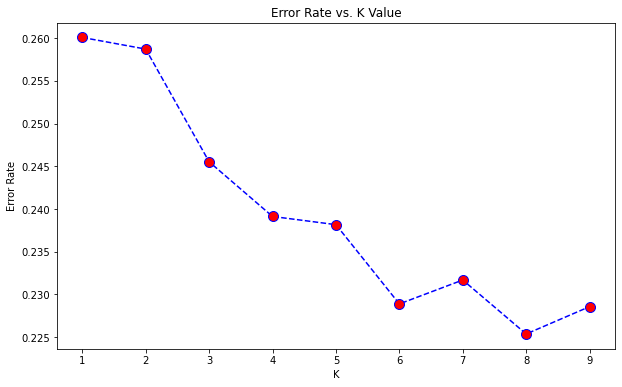

In [46]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


<AxesSubplot:>

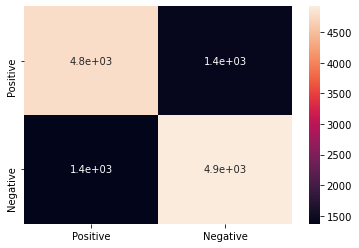

In [47]:

import seaborn as sns   
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)


In [ ]:
# K means 1-10 TF- IDF limited

In [48]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf2,y_train)
 pred_i = knn.predict(X_test_tf2)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.22536 at K = 8


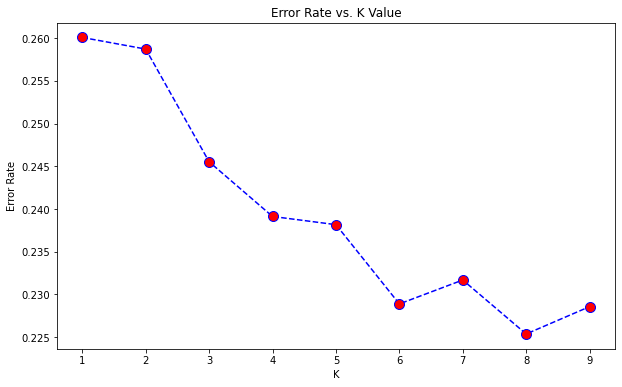

In [49]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


In [ ]:
# K means 1-10 CV 

In [ ]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_cv,y_train)
 pred_i = knn.predict(X_test_cv)
 error_rate.append(np.mean(pred_i != y_test))


In [ ]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)+1))


# K means from 10 till 100 

In [32]:
error_rate = []
minR = 10 
maxR = 100
for i in range(10, 100, 10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.27783155856727976 at K = 8


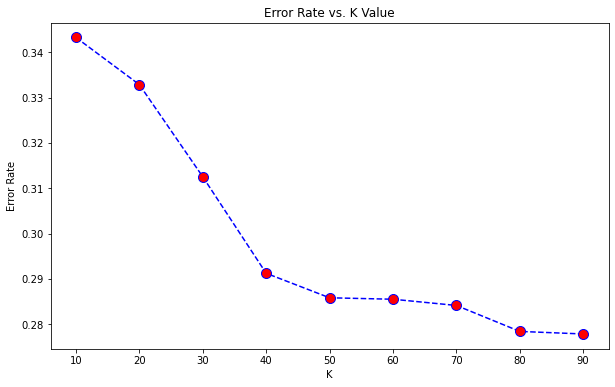

In [43]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 10)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


# K Means from 100 to 1000

In [44]:
error_rate = []
minR = 100 
maxR = 10000
for i in range(100, 10000, 1000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.27637947725072604 at K = 0


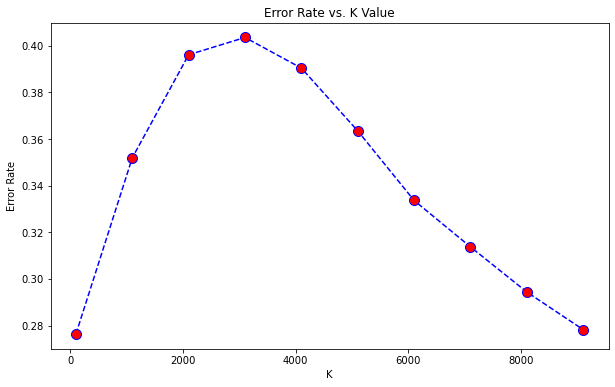

In [46]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


In [ ]:
# K Means from 3000 to 30000

In [ ]:
error_rate = []
minR = 3000 
maxR = 30000
for i in range(minR, maxR, 3000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


In [ ]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate)))


# Linear Support Vector Classification.

In [20]:
# LinearSVC + Tf IDF

In [21]:
from sklearn.svm import LinearSVC
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf, y_train)
y_pred = SVclassifier.predict(X_test_tf)

In [22]:
#result LinearSVC + Tf IDF

In [23]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm2 = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#import seaborn as sns   
#sns.heatmap(cm, annot=True)

accuracy:   0.881
              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      6168
    Negative       0.88      0.89      0.88      6228

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

confusion matrix:
[[5344  824]
 [ 870 5358]]
------------------------------


In [24]:
#LinearSVC + Tf IDF limited

In [25]:
   
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf2, y_train)
y_pred = SVclassifier.predict(X_test_tf2)

In [26]:
#result LinearSVC + Tf IDF limited

accuracy:   0.879
              precision    recall  f1-score   support

    Positive       0.88      0.87      0.88      6168
    Negative       0.87      0.89      0.88      6228

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

confusion matrix:
[[5375  793]
 [ 712 5516]]
------------------------------


<AxesSubplot:>

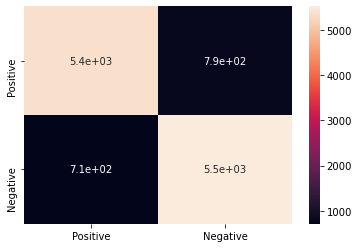

In [27]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# For presi


NameError: name 'cm1' is not defined

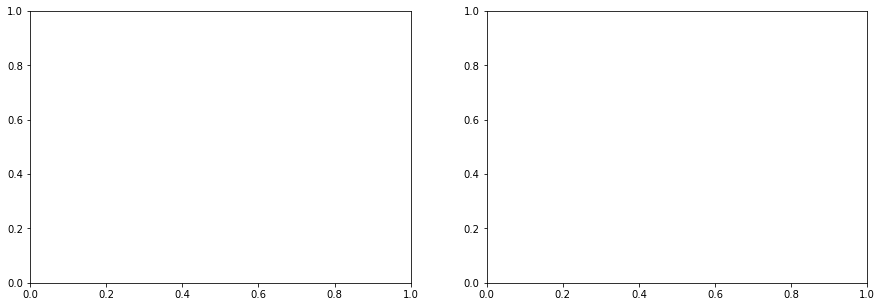

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]


C1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
C2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

sns.heatmap(ax = axis[0],data= cm1,annot=C1, xticklabels=x_axis_labels, yticklabels=y_axis_labels )
axis[0].set_title("With Naive Bayes Tf- IDF")

sns.heatmap(ax = axis[1],data=cm2,annot=C2,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)
axis[1].set_title("With SVCLinear Td-idf ")

In [155]:
C1

array([[0.8656932 , 0.13578845],
       [0.13863928, 0.85983128]])

In [ ]:
# LinearSVC + Count Vect

In [29]:
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_cv, y_train)
y_pred = SVclassifier.predict(X_test_cv)

In [30]:
#result LinearSVC + CV

In [31]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')
 

accuracy:   0.850
              precision    recall  f1-score   support

    Positive       0.85      0.85      0.85      6168
    Negative       0.85      0.85      0.85      6228

    accuracy                           0.85     12396
   macro avg       0.85      0.85      0.85     12396
weighted avg       0.85      0.85      0.85     12396

confusion matrix:
[[5216  952]
 [ 910 5318]]
------------------------------


#  SVM with the Radial Basis Function

In [38]:
from sklearn.svm import SVC
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf')

In [ ]:
rbf_svc.fit(X_train_tf, y_train)
y_pred = rbf_svc.predict(X_test_tf)

In [ ]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# Just SVC


In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [52]:
# SVC + Tf IDF

In [ ]:
SVCclassifier = SVC()
     
SVCclassifier.fit(X_train_tf, y_train)
y_pred = SVCclassifier.predict(X_test_tf)


In [ ]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# Linear Discriminant
#TF - IDF limited

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_tf2.todense(), y_train)
y_pred = clf.predict(X_test_tf2.todense())

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.